In [58]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt

In [59]:
ImgFolder= r'D:/AI_DS/Quarter_2/Deep learning/Project/archive (2)/IMG_CLASSES'
extension = ['jpeg','jpg', 'bmp', 'png']

In [60]:
for image_class in os.listdir(ImgFolder): 
    for image in os.listdir(os.path.join(ImgFolder, image_class)):
        image_path = os.path.join(ImgFolder, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in extension: 
                os.remove(image_path)
        
        except Exception as e: 
            print("Problem!!")

In [61]:
data = tf.keras.utils.image_dataset_from_directory(ImgFolder)

Found 3780 files belonging to 2 classes.


In [62]:
data_iterator = data.as_numpy_iterator()

In [63]:
batch = data_iterator.next()

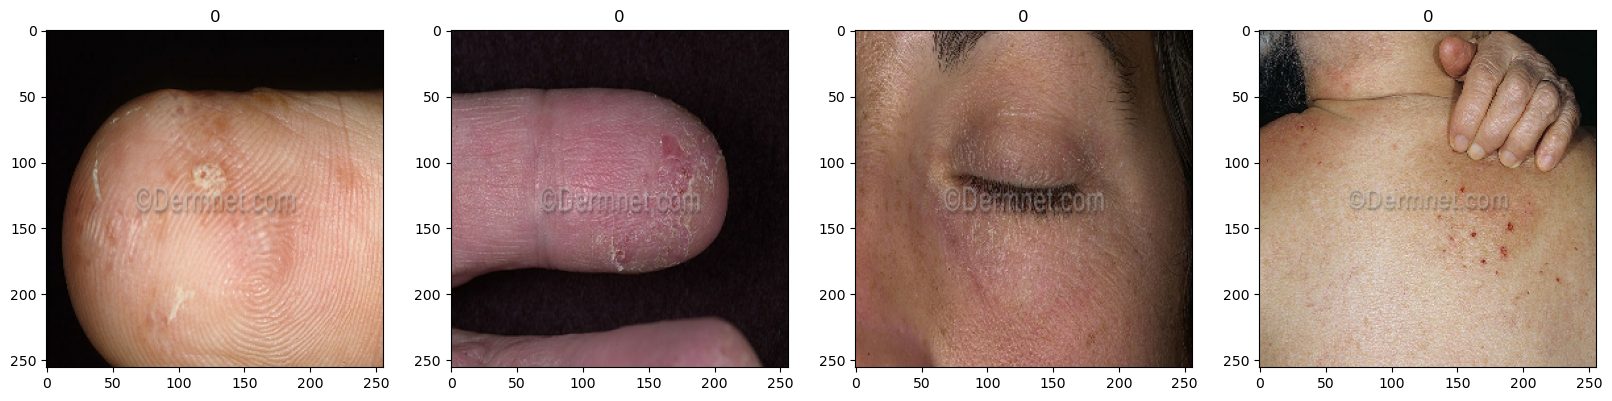

In [64]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [65]:
data = data.map(lambda x,y: (x/255, y))

In [66]:
data.as_numpy_iterator().next()

(array([[[[0.5921569 , 0.44705883, 0.37254903],
          [0.5912837 , 0.4453125 , 0.3708027 ],
          [0.58386946, 0.4348499 , 0.35742953],
          ...,
          [0.6485141 , 0.5230239 , 0.4249847 ],
          [0.6501072 , 0.524617  , 0.4265778 ],
          [0.66913295, 0.5472733 , 0.4383425 ]],
 
         [[0.6100665 , 0.46182814, 0.38685217],
          [0.5940683 , 0.44565597, 0.36486554],
          [0.57677925, 0.42426357, 0.34405863],
          ...,
          [0.6461834 , 0.5226682 , 0.41870403],
          [0.6476661 , 0.52531624, 0.41785607],
          [0.65436363, 0.532737  , 0.42310706]],
 
         [[0.6092831 , 0.45240504, 0.36984348],
          [0.5924383 , 0.43497697, 0.35000455],
          [0.58579   , 0.42484286, 0.34035364],
          ...,
          [0.65248996, 0.52257967, 0.41684482],
          [0.64880854, 0.51938146, 0.41219702],
          [0.638564  , 0.5091369 , 0.3995274 ]],
 
         ...,
 
         [[0.84995764, 0.6852518 , 0.6225067 ],
          [0.83399

In [67]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [70]:
model = Sequential()

In [71]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [74]:
logdir='logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
83/83 [==============================] - 43s 495ms/step - loss: 0.6600 - accuracy: 0.6325 - val_loss: 0.5881 - val_accuracy: 0.7188
Epoch 2/15
83/83 [==============================] - 41s 488ms/step - loss: 0.5832 - accuracy: 0.7150 - val_loss: 0.5521 - val_accuracy: 0.7269
Epoch 3/15
83/83 [==============================] - 43s 518ms/step - loss: 0.5351 - accuracy: 0.7500 - val_loss: 0.5437 - val_accuracy: 0.7405
Epoch 4/15
83/83 [==============================] - 45s 535ms/step - loss: 0.5249 - accuracy: 0.7534 - val_loss: 0.5593 - val_accuracy: 0.7160
Epoch 5/15
83/83 [==============================] - 42s 500ms/step - loss: 0.4776 - accuracy: 0.7797 - val_loss: 0.5710 - val_accuracy: 0.7160
Epoch 6/15
83/83 [==============================] - 42s 505ms/step - loss: 0.4340 - accuracy: 0.8091 - val_loss: 0.5207 - val_accuracy: 0.7541
Epoch 7/15
83/83 [==============================] - 43s 511ms/step - loss: 0.3856 - accuracy: 0.8294 - val_loss: 0.5630 - val_accuracy: 0.7323

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 124ms/step


In [80]:

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7719298, shape=(), dtype=float32) tf.Tensor(0.80733943, shape=(), dtype=float32) tf.Tensor(0.73295456, shape=(), dtype=float32)


In [81]:
import cv2

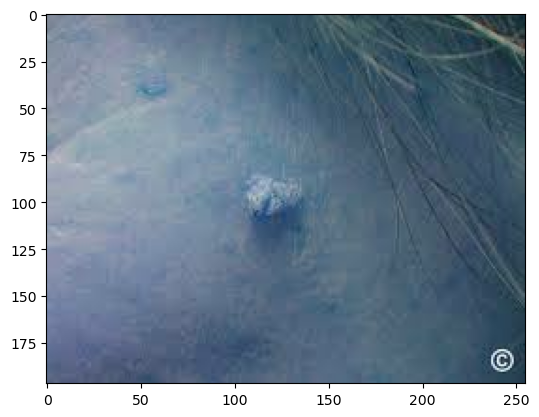

In [89]:
img = cv2.imread("sdf.jpeg")
plt.imshow(img)
plt.show()

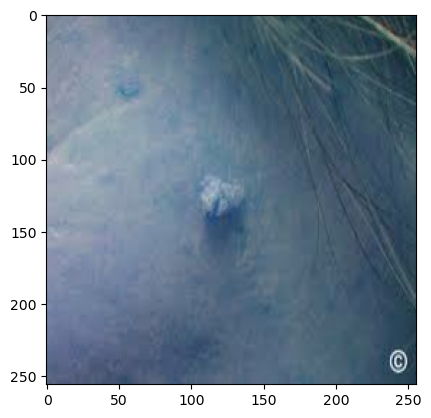

In [90]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [91]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[127.      , 136.      , 150.      ],
        [128.98828 , 137.98828 , 151.98828 ],
        [131.9707  , 139.98047 , 156.95117 ],
        ...,
        [ 32.009766,  54.009766,  66.009766],
        [ 33.01758 ,  55.01172 ,  67.0293  ],
        [ 36.      ,  57.      ,  72.      ]],

       [[127.      , 136.      , 150.      ],
        [128.33781 , 137.33781 , 151.33781 ],
        [131.3164  , 139.32617 , 156.29688 ],
        ...,
        [ 26.101925,  48.101925,  60.101925],
        [ 25.173683,  47.167824,  59.185402],
        [ 29.457031,  50.45703 ,  65.45703 ]],

       [[126.57617 , 135.57617 , 149.57617 ],
        [127.99165 , 136.99165 , 150.99165 ],
        [130.55101 , 138.56078 , 155.53148 ],
        ...,
        [ 19.166016,  42.4375  ,  53.589844],
        [ 17.224777,  40.490402,  51.65784 ],
        [ 23.88086 ,  46.152344,  59.88086 ]],

       ...,

       [[ 92.42383 , 104.42383 , 132.42383 ],
        [ 90.

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 49ms/step


array([[0.9199431]], dtype=float32)

In [93]:
import numpy as np

In [99]:
if yhat<= 0.5: 
    print(f'Predicted class is Eczema')
else:
    print(f'Predicted class is Warts')

Predicted class is Warts
